In [60]:
import requests
from selenium import webdriver
from urllib import parse, request
import time
from bs4 import BeautifulSoup as bs
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import os
import numpy as np
import mediapipe as mp
import PIL
import urllib
import random
from selenium.webdriver.common.keys import Keys

In [63]:
max_cnt = 20
text = '풍경사진'
keyword = parse.quote(text)
url = 'https://www.pexels.com/ko-kr/search/{}/'

browser = webdriver.Chrome(executable_path = 'C:/workspace/jupyter_AI_Data_Lab/chromedriver/chromedriver.exe')
browser.maximize_window()
browser.get(url.format(keyword))

# SCROLL_PAUSE_SEC = 1

# # 스크롤 높이 가져옴
# last_height = browser.execute_script("return document.body.scrollHeight")

# while True:
#     # 끝까지 스크롤 다운
#     browser.execute_script("window.scrollTo(0, 2000);")

#     # 1초 대기
#     time.sleep(SCROLL_PAUSE_SEC)

#     # 스크롤 다운 후 스크롤 높이 다시 가져옴
#     new_height = browser.execute_script("return document.body.scrollHeight")
#     if new_height == last_height:
#         break
#     last_height = new_height

for i in range(5):
    browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(2)

urls = []
idx = 1
while True:
    try:
        for i in range(1,5):
            photo_items = browser.find_element_by_xpath("/html/body/div[1]/div[4]/div[6]/div[1]/div[{}]/div[{}]/article/a[1]/img".format(i,idx))
            img_url = photo_items.get_attribute('data-big-src')
            urls.append(str(img_url))
        idx += 1
    except: break

# img_urls = [x.get_attribute('data-big-src') for x in photo_items]

# idx = 1

# for img_url in img_urls:
#     time.sleep(2)
    
#     browser.get(img_url)
    
#     res = requests.get(img_url)
#     if res.ok:
#         file_name = f'{text}_{idx}.jpeg'
#         with open(file_name, 'wb') as f:
#             f.write(res.content)
#         print(f'({idx} {file_name}') # (2) 풍경사진_2.jpeg
#         idx += 1
        
#     if idx > max_cnt:
#         break
    
browser.quit()

C:\Users\LG\AppData\Local\Temp\ipykernel_29424\3391629701.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(executable_path = 'C:/workspace/jupyter_AI_Data_Lab/chromedriver/chromedriver.exe')
C:\Users\LG\AppData\Local\Temp\ipykernel_29424\3391629701.py:29: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead
  browser.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
C:\Users\LG\AppData\Local\Temp\ipykernel_29424\3391629701.py:37: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  photo_items = browser.find_element_by_xpath("/html/body/div[1]/div[4]/div[6]/div[1]/div[{}]/div[{}]/article/a[1]/img".format(i,idx))


In [64]:
len(urls)

26

In [68]:
bgimg_List = []
for index_ in range(len(urls)):
    # request.urlopen()
    # HTTP Error 403: Forbidden 에러 때문에 하단의 소스 한 줄을 추가해주었다.
    req = urllib.request.Request(urls[index_], headers = {"User-Agent" : "Mozilla/5.0"})
    res = request.urlopen(req).read()

    # Image open in PIL.JpegImage.JpegImage
    bgimg = Image.open(BytesIO(res))
    # JpegImage to numpy array
    im = PIL.Image.fromarray(np.uint8(bgimg))
    bgimg_result = np.array(im)
    bgimg_List.append(bgimg_result)

In [66]:
# initialize mediapipe
mp_selfie_segmentation = mp.solutions.selfie_segmentation
selfie_segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

In [67]:
# AI Hub 얼굴 이미지의 모든 사람 번호를 List에 저장
peopleNum = os.listdir('D:\High_Resolution')
peopleNum

['19062421',
 '19062431',
 '19062521',
 '19062531',
 '19062542',
 '19062621',
 '19062622',
 '19062641',
 '19062722',
 '19062731',
 '19062732',
 '19062811',
 '19062831',
 '19062832',
 '19062841',
 '19062842',
 '19070121',
 '19070142',
 '19070212',
 '19070221',
 '19070222',
 '19070231',
 '19070241',
 '19070242',
 '19070311',
 '19070312',
 '19070321',
 '19070322',
 '19070331',
 '19070412',
 '19070421',
 '19070431',
 '19070442',
 '19070522',
 '19070531',
 '19070532',
 '19070541',
 '19070831',
 '19070841',
 '19070912',
 '19070921',
 '19070922',
 '19070931',
 '19070942',
 '19071011',
 '19071021',
 '19071022',
 '19071032',
 '19071041',
 '19071111',
 '19071121',
 '19071131',
 '19071132',
 '19071141',
 '19071142',
 '19071211',
 '19071221',
 '19071222',
 '19071231',
 '19071241',
 '19071242',
 '19071511',
 '19071512',
 '19071521',
 '19071522',
 '19071532',
 '19071542',
 '19071611',
 '19071621',
 '19071622',
 '19071641',
 '19071642',
 '19071711',
 '19071712',
 '19071721',
 '19071731',
 '19071732',

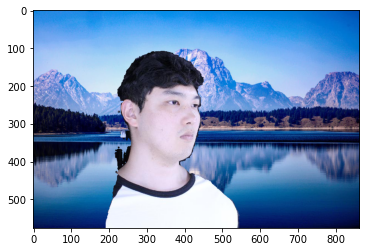

In [81]:
# roop 돌리기 전에 확인해보는 코드

personImg = r'D:\High_Resolution\19062421\S001\L1\E01\C4.jpg'

pimg_pil = cv2.imread(personImg, cv2.COLOR_BGR2RGB)

# flip the frame to horizontal direction
personImg = cv2.flip(pimg_pil, 1)

height , width, channel = personImg.shape

RGB = cv2.cvtColor(personImg, cv2.COLOR_BGR2RGB)

# get the result
results = selfie_segmentation.process(RGB)

# extract segmented mask
mask = results.segmentation_mask

# mask에서 condition이 적용되는 곳을 True 반환, 나머지를 False 반환
condition = np.stack(
(results.segmentation_mask,) * 3, axis=-1) > 0.5

# 배경 이미지 크기를 원본 이미지 크기와 동일하게 맞춰 주는 코드
bg_image = cv2.resize(bgimg_List[random.randint(0,25)], (width, height))
bg_image = cv2.cvtColor(bg_image, cv2.COLOR_BGR2RGB)
# condition을 이용하여 출력 이미지 생성 (condition, 사람 이미지, 배경 이미지)
output_image = np.where(condition, personImg, bg_image)

output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

plt.imshow(output_image)
plt.show()

In [ ]:
# 얼굴 45도 각도 양쪽과 얼굴 정면 3가지 각만 사용
rads = ['C4','C7','C10']

for personNum in peopleNum:
    for rad in rads:
        # masking 할 인물 이미지 불러오기
        personImg = r'D:\High_Resolution\{}\S001\L1\E01\{}.jpg'.format(personNum, rad)

        pimg_pil = cv2.imread(personImg, cv2.COLOR_BGR2RGB)

        # flip the frame to horizontal direction
        personImg = cv2.flip(pimg_pil, 1)

        height , width, channel = personImg.shape

        RGB = cv2.cvtColor(personImg, cv2.COLOR_BGR2RGB)

        # get the result
        results = selfie_segmentation.process(RGB)

        # extract segmented mask
        mask = results.segmentation_mask

        # mask에서 condition이 적용되는 곳을 True 반환, 나머지를 False 반환
        condition = np.stack(
          (results.segmentation_mask,) * 3, axis=-1) > 0.5

        # 배경 이미지 크기를 원본 이미지 크기와 동일하게 맞춰 주는 코드
        bg_image = cv2.resize(bgimg_List[random.randint(0,25)], (width, height))
        bg_image = cv2.cvtColor(bg_image, cv2.COLOR_BGR2RGB)
        
        # condition을 이용하여 출력 이미지 생성 (condition, 사람 이미지, 배경 이미지)
        output_image = np.where(condition, personImg, bg_image)
        output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

        plt.imsave(r'저장경로/파일명'.format(personNum, rad),output_image)